In [1]:
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input, Flatten, Dense

2024-10-03 20:13:27.391361: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 20:13:27.429230: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-10-03 20:13:27.587982: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-10-03 20:13:27.729167: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-10-03 20:13:27.765686: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-03 20:13:28.061276: I tensorflow/core/platform/cpu_feature_gu

# Visualizing Convolutional Feature Map

In [2]:
# Load MNIST data and prepare a single image
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [3]:
# Reshape and normalize
x_train = x_train.reshape(-1, 28, 28, 1).astype("float32") / 255.0

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28)
(60000,)
(10000,)


In [15]:
x_train = x_train[:1000,:,:,:]
y_train = y_train[:1000]

print(x_train.shape)
print(y_train.shape)

(1000, 28, 28, 1)
(1000,)


In [13]:
## Define model with a single convolutional layer model

# Input layer for grayscale image
inputs = Input(shape=(28, 28, 1))

# Layer with 6 filters, each with shape (3, 3), no bias
conv1 = Conv2D(
    filters=6,
    kernel_size=(3, 3),
    activation='relu',
    use_bias=False,
    name='Conv2D_1')(inputs)

# Flatten the feature map to a 1D vector
flatten = Flatten()(conv1)

# Output layer for 10 classes
dense = Dense(10, activation='softmax')(flatten)

model = Model(inputs=inputs, outputs=dense)

In [6]:
## compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=5)  # Train the model

2024-10-03 20:13:35.032340: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
  14/1875 ━━━━━━━━━━━━━━━━━━━━ 23s 13ms/step - accuracy: 0.2686 - loss: 2.1869

2024-10-03 20:13:37.993096: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18787392 exceeds 10% of free system memory.
2024-10-03 20:13:38.016560: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18787392 exceeds 10% of free system memory.
2024-10-03 20:13:38.029417: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18787392 exceeds 10% of free system memory.
2024-10-03 20:13:38.043043: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 18787392 exceeds 10% of free system memory.


1875/1875 ━━━━━━━━━━━━━━━━━━━━ 20s 10ms/step - accuracy: 0.8672 - loss: 0.4747
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 9ms/step - accuracy: 0.9530 - loss: 0.1601
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9646 - loss: 0.1221
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 17s 9ms/step - accuracy: 0.9735 - loss: 0.0900
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 19s 8ms/step - accuracy: 0.9810 - loss: 0.0641


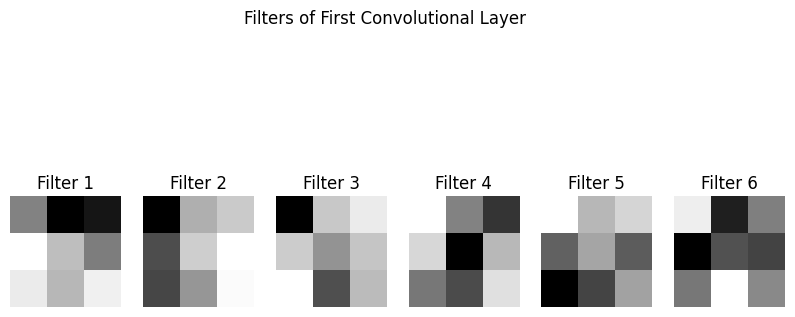

In [7]:
# Extract the filters (weights) from the first convolutional layer
filters = model.get_layer(name='Conv2D_1').get_weights()[0]  # Get the kernel weights
filters = filters[:, :, 0, :]  # Remove unnecessary dimensions

# Plot the filters
plt.figure(figsize=(10, 5))
for i in range(filters.shape[-1]):
    ax = plt.subplot(1, 6, i + 1)  # Create subplots in a 1x6 grid
    plt.imshow(filters[:, :, i], cmap='gray')  # Display each filter
    plt.axis('off')
    plt.title(f"Filter {i + 1}")
plt.suptitle("Filters of First Convolutional Layer")
plt.show()


In [8]:
# Create a sub-model to get the output of the first convolutional layer
layer1_outputs = Model(inputs=model.input, outputs=conv1)

7


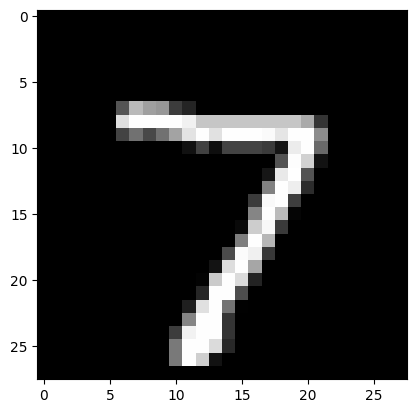

In [9]:
# Extract first image for testing
test_image = x_test[0:1]
plt.imshow(test_image[0],cmap='gray')
# As well as the target class
y = y_test[0]
print(y)

In [10]:
# Pass an image through the first conv layer
feature_maps = layer1_outputs.predict(test_image)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step


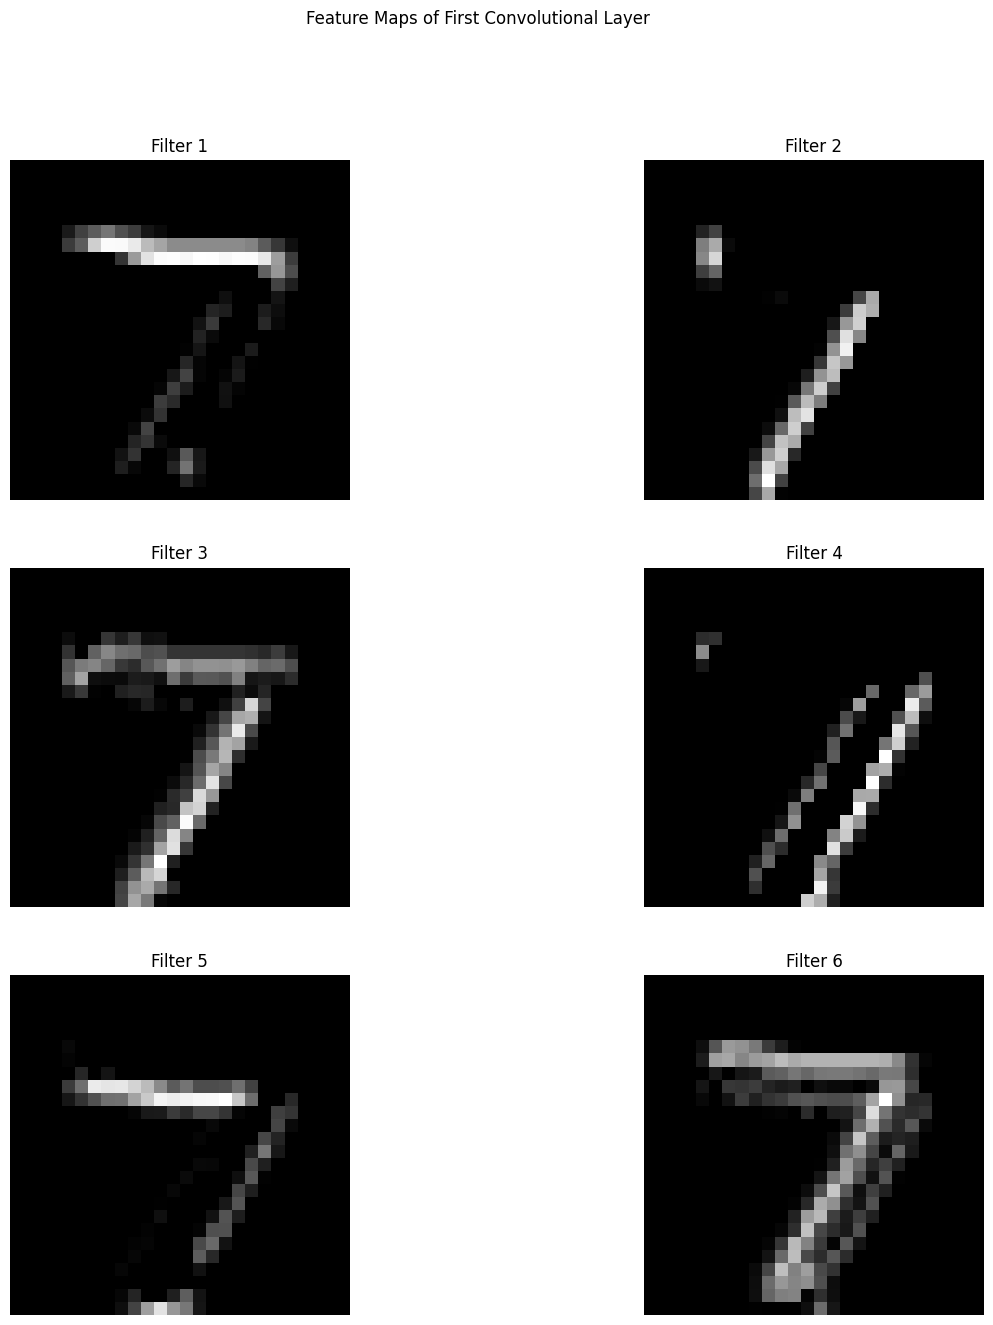

In [11]:
# 4. Plot the output feature maps
num_filters = feature_maps.shape[-1]  # Number of filters in the layer
plt.figure(figsize=(15, 15))
for i in range(num_filters):
    ax = plt.subplot(3, 2, i + 1)  # Create subplots in a 3x2 grid
    plt.imshow(feature_maps[0, :, :, i], cmap='gray')  # Show each filter's output
    plt.axis('off')
    plt.title(f"Filter {i + 1}")
plt.suptitle("Feature Maps of First Convolutional Layer")
plt.show()